In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

from imblearn.datasets import fetch_datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
#from sklearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

C:\Users\praveen330\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
df= pd.read_csv("D:/machine learning casestudies/Credit Card Fraud Detection/creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [6]:
df.isnull().sum().max()

0

In [7]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Text(0.5, 1.0, 'Class Distribution \n (0: No Fraud || 1: Fraud)')

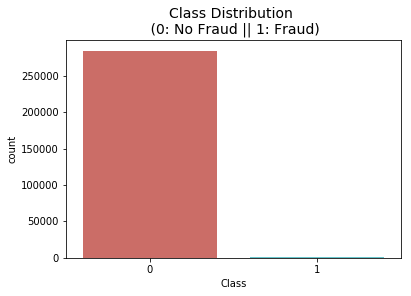

In [8]:
sns.countplot(x='Class', data=df, palette='hls')
plt.title('Class Distribution \n (0: No Fraud || 1: Fraud)', fontsize= 14)

Distribution: by seeing this we can understand the class attribute is completely imbalanced, we need to use technique to reduce the skweness

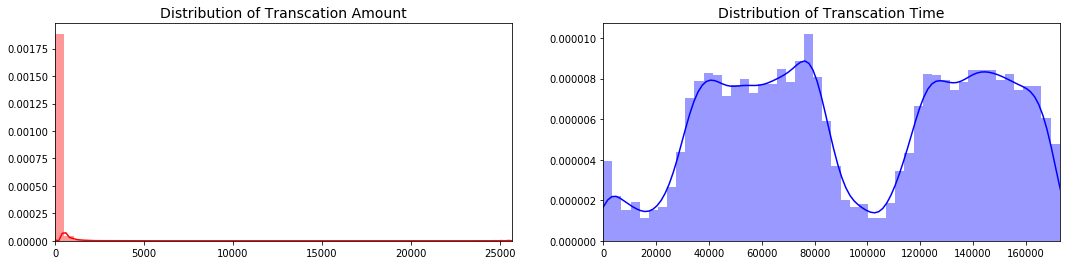

In [9]:
fig, ax= plt.subplots(1,2, figsize= (18,4))

amount_val= df['Amount'].values
time_val= df['Time'].values

sns.distplot(amount_val, ax=ax[0], color= 'r')
ax[0].set_title('Distribution of Transcation Amount', fontsize= 14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color= 'b')
ax[1].set_title('Distribution of Transcation Time', fontsize= 14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

# Scaling and Distribution
In this phase of our kernal, we will first scale the columns of time and amount as other columns. on the other hand we need to create a sub sample of the data frame inn order to have an equal amount of fraud and non fraud cases, this helps the algorithm to find patterns

Sub-Sample: sub-sample will have a dataframe with 50-50 ratio of fraud and non fraud transcations.
we create sub-sample as the data is imbalanced, if we use imbalanced data without sub-sample, then model might lead to overfitting and wrong correlation can be observed between the feature and label

In [10]:
df.groupby(['Class']).size()

Class
0    284315
1       492
dtype: int64

Scaled amount and scaled time are the cloumns with scaled values

There are 492 cases of fraud in our dataset so we can randomly get 492 cases of non fraud to create our new sub dataframe.
we concat 492 cases of fraud and non fraud by creating a new sub-sample

In [11]:
#since most of our data has already been scaled we columns that are left to zero (amount and time)
from sklearn.preprocessing import StandardScaler, RobustScaler
#Robust is less prone to outliers

std_scaler= StandardScaler()
rob_scaler= RobustScaler()

df['scaled_amount']= rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time']= rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time', 'Amount'], axis=1, inplace= True)

In [12]:
scaled_amount= df['scaled_amount']
scaled_time= df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'],axis=1, inplace=True)
df.insert(0,'scaled_amount', scaled_amount)
df.insert(1,'scaled_time', scaled_time)
#Amount and Time are scaled
df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [13]:
#Splitting the Data (orginal DataFrame)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('No Frauds', round(df['Class'].value_counts()[0]/ len(df)* 100,2), '%of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/ len(df)* 100,2), '%of the dataset')

X= df.drop('Class', axis=1)
y= df['Class']

sss= StratifiedShuffleSplit(n_splits=5, test_size= 0.2, random_state= 42)

for train_index, test_index in sss.split(X,y):
    print("Train:", train_index, "Test:", test_index)
    orginal_Xtrain, orginal_Xtest= X.iloc[train_index], X.iloc[test_index]
    orginal_ytrain, orginal_ytest= y.iloc[train_index], y.iloc[test_index]

#Check the Distribution of the Labels
orginal_Xtrain= orginal_Xtrain.values
orginal_Xtest= orginal_Xtest.values
orginal_ytrain= orginal_ytrain.values
orginal_ytest= orginal_ytest.values

#see if both the train and test label distribution are similarily distributed
train_unique_label, train_count_label= np.unique(orginal_ytrain, return_counts= True)
test_unique_label, test_count_label= np.unique(orginal_ytest, return_counts= True)
print('-' * 100)

print('Label Distributions: \n')
print(train_count_label / len(orginal_ytrain))
print(test_count_label / len(orginal_ytest))

No Frauds 99.83 %of the dataset
Frauds 0.17 %of the dataset
Train: [265518 180305  42664 ...  29062  13766  17677] Test: [263020  11378 147283 ... 274532 269819  64170]
Train: [ 72227 114282  16818 ... 264471 191914 284017] Test: [202638  32978 128121 ... 244024 127667  48318]
Train: [ 20895 114622 167683 ... 244502 178972 218506] Test: [284352  82483  90981 ... 171224 168807 271602]
Train: [122248 181660 194400 ... 104631 277586  29432] Test: [225673  63348  68025 ... 279451  77554  76043]
Train: [241684 223467 136928 ...  86495 160550  49633] Test: [157557 204860  83760 ... 251478 178967 216850]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827075 0.00172925]
[0.99827955 0.00172045]


# Random Under Sampling
But random under sampling will not perform as accurate 

In [14]:
#since our classes are highly skewed we should make them equivalent in order to have a normal distribution
#lets shuffle the data before creating the subsamples
df= df.sample(frac=1)

#amount of fraud classes 492rows
fraud_df= df.loc[df['Class']==1]
non_fraud_df= df.loc[df['Class']==0][:492]
normal_distributed_df= pd.concat([fraud_df, non_fraud_df])

#shuffle dataframe rows
new_df= normal_distributed_df.sample(frac=1, random_state= 42)
new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
272162,0.389855,0.942798,-0.601062,0.286928,0.135657,-2.174748,0.912174,-0.985859,1.225321,-0.336932,...,0.260397,0.406527,0.911156,-0.640593,-0.428017,1.302065,0.224560,-0.076213,0.010951,0
53794,-0.293440,-0.452813,-1.346509,2.132431,-1.854355,2.116998,-1.070378,-1.092671,-2.230986,1.036425,...,0.221919,0.609508,0.202874,-0.060791,-0.186733,-0.017401,-0.283751,0.395451,0.233139,1
150675,0.168378,0.107920,-1.351762,2.027833,2.252862,4.194782,0.388151,1.431331,0.353913,-0.023559,...,0.631995,-0.503753,-0.627749,-0.133366,0.483839,-0.065673,0.065062,-0.325360,-0.411590,0
27749,-0.041640,-0.587472,-0.860827,3.131790,-5.052968,5.420941,-2.494141,-1.811287,-5.479117,1.189472,...,1.085760,1.192694,0.090356,-0.341881,-0.215924,1.053032,0.271139,1.373300,0.691195,1
212644,9.863900,0.637343,-2.356348,1.746360,-6.374624,1.772205,-3.439294,1.457811,-0.362577,1.443791,...,0.194810,0.857942,0.621203,0.964817,-0.619437,-1.732613,0.108361,1.130828,0.415703,1


In [15]:
new_df.shape #new dataset new_df has 492 + 492= 984 records

(984, 31)

# Equally Distributed and Correlating:
Now the dataset is balanced , we can proceed with further datapreprocessing

Distribution of the classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


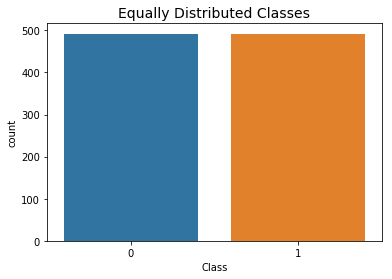

In [16]:
print('Distribution of the classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))
sns.countplot('Class', data= new_df)
plt.title('Equally Distributed Classes', fontsize= 14)
plt.show()

# Correlation Matrices

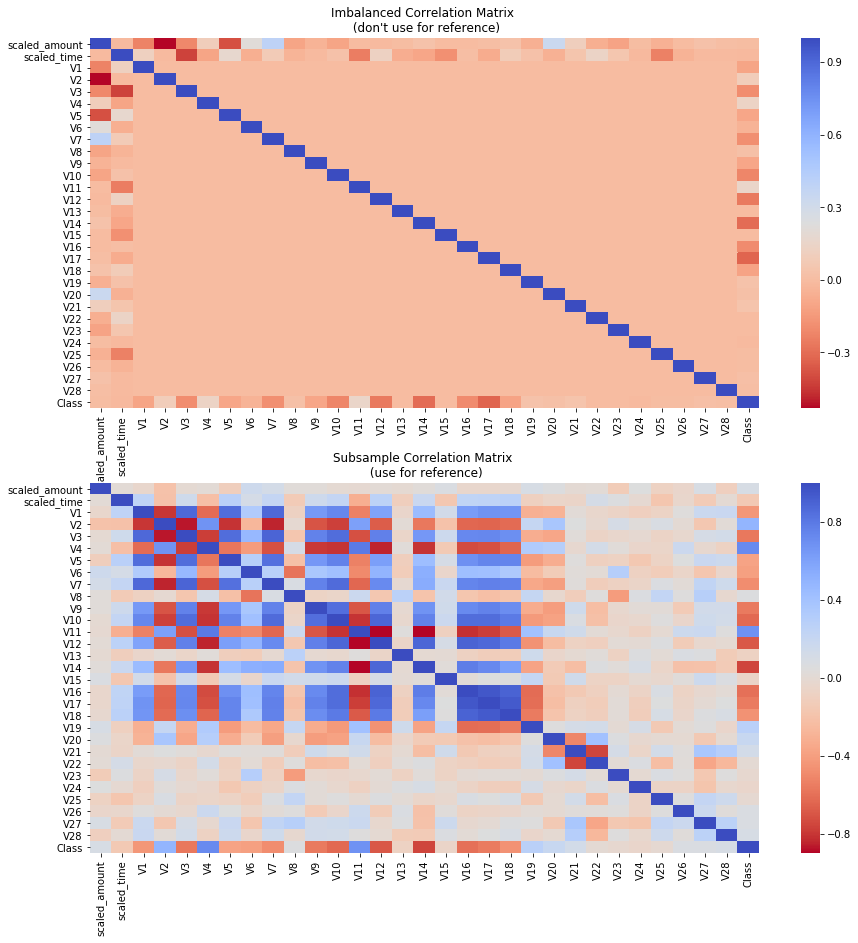

In [17]:
f, (ax1, ax2)= plt.subplots(2,1, figsize= (15,15))
#entire dataframe
corr=df.corr()
sns.heatmap(corr, cmap= 'coolwarm_r', annot_kws={'size':20}, ax= ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=12)

sub_sample_corr= new_df.corr()
sns.heatmap(sub_sample_corr, cmap= 'coolwarm_r', annot_kws={'size':20}, ax= ax2)
ax2.set_title("Subsample Correlation Matrix \n (use for reference)", fontsize=12)
plt.show()

Negative Correlations: V17, V14, V12 and V10 are negatively correlated. Notice how the lower these values are, the more likely
the end result will be a fraud transaction.

Positive Correlations: V2, V4, V11, and V19 are positively correlated. Notice how the higher these values are, the more likely
the end result will be a fraud transaction.

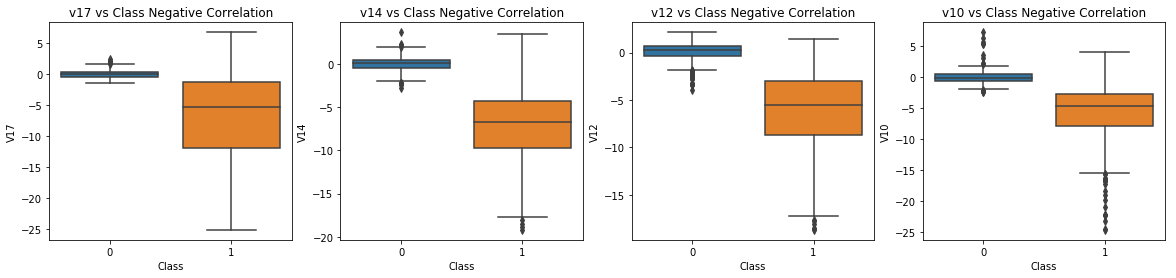

In [18]:
#negative correlation with our class (the lower our feature value are more likely to be fraud transcation)
f, axes= plt.subplots(ncols= 4, figsize= (20,4))

sns.boxplot(x="Class", y="V17", data=new_df, ax=axes[0])
axes[0].set_title('v17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, ax=axes[1])
axes[1].set_title('v14 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V12", data=new_df, ax=axes[2])
axes[2].set_title('v12 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V10", data=new_df, ax=axes[3])
axes[3].set_title('v10 vs Class Negative Correlation')

plt.show()

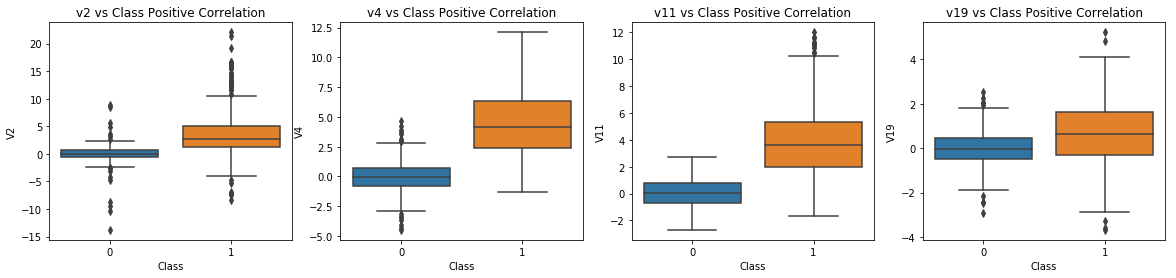

In [19]:
#positive correlation (the higher the feature the probability increases says that the fraud transcation)
f, axes= plt.subplots(ncols= 4, figsize= (20,4))

sns.boxplot(x="Class", y="V2", data=new_df, ax=axes[0])
axes[0].set_title('v2 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_df, ax=axes[1])
axes[1].set_title('v4 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V11", data=new_df, ax=axes[2])
axes[2].set_title('v11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V19", data=new_df, ax=axes[3])
axes[3].set_title('v19 vs Class Positive Correlation')

plt.show()

# Anomaly Detection:
we need to remove extreme outliers from the features that have high correlation with our Class label, This will have a positive impact on the model

Text(0.5, 1.0, 'v10 Distribution \n (Fraud Transactions)')

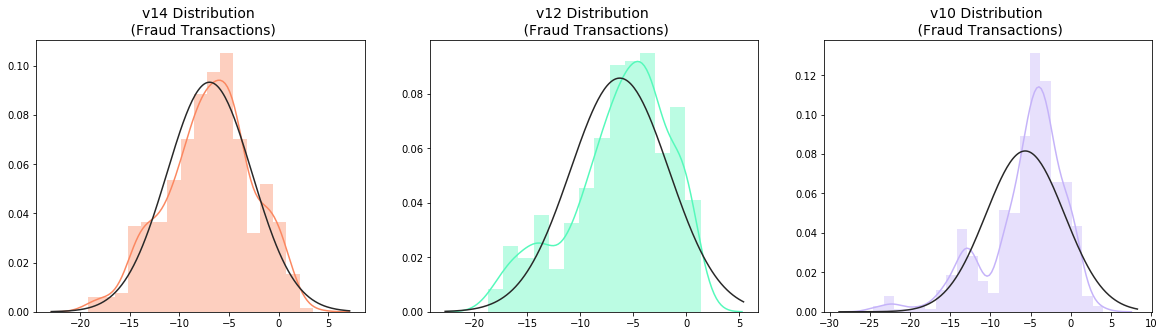

In [20]:
from scipy.stats import norm
f,(ax1,ax2,ax3)= plt.subplots(1,3, figsize= (20,5))

v14_fraud_dist= new_df['V14'].loc[new_df['Class']==1].values
sns.distplot(v14_fraud_dist, ax=ax1, fit=norm, color= '#FB8861')
ax1.set_title('v14 Distribution \n (Fraud Transactions)', fontsize= 14)

v12_fraud_dist= new_df['V12'].loc[new_df['Class']==1].values
sns.distplot(v12_fraud_dist, ax=ax2, fit=norm, color= '#56F9BB')
ax2.set_title('v12 Distribution \n (Fraud Transactions)', fontsize= 14)

v10_fraud_dist= new_df['V10'].loc[new_df['Class']==1].values
sns.distplot(v10_fraud_dist, ax=ax3, fit=norm, color= '#C5B3F9')
ax3.set_title('v10 Distribution \n (Fraud Transactions)', fontsize= 14)

In [21]:
#V14 removing outlier (highest negative correlated with labels)
v14_fraud= new_df['V14'].loc[new_df['Class']==1].values
q25, q75= np.percentile(v14_fraud,  25), np.percentile(v14_fraud, 75)
print('Quartile_25:{} | Quartile_25:{}'.format(q25, q75))
v14_iqr= q75-q25
print('iqr:{}'.format(v14_iqr))

v14_cut_off= v14_iqr * 1.5
v14_lower, v14_upper= q25- v14_cut_off, q75+v14_cut_off
print('cut off:{}'.format(v14_cut_off))
print('v14 Lower: {}'.format(v14_lower))
print('v14 Upper: {}'.format(v14_upper))

outliers= [x for x in v14_fraud if x<v14_lower or x>v14_upper]
print('Feature v14 outliers for fraud class:{}'.format(len(outliers)))
print('v14 outliers:{}'.format(outliers))

new_df= new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14']< v14_lower)].index)

print('-----'*44)

v12_fraud= new_df['V12'].loc[new_df['Class']==1].values
q25, q75= np.percentile(v12_fraud,  25), np.percentile(v12_fraud, 75)
print('Quartile_25:{} | Quartile_25:{}'.format(q25, q75))
v12_iqr= q75-q25
print('iqr:{}'.format(v12_iqr))

v12_cut_off= v14_iqr * 1.5
v12_lower, v12_upper= q25- v12_cut_off, q75+v12_cut_off
print('cut off:{}'.format(v12_cut_off))
print('v12 Lower: {}'.format(v12_lower))
print('v12 Upper: {}'.format(v12_upper))

outliers= [x for x in v12_fraud if x<v12_lower or x>v12_upper]
print('Feature v12 outliers for fraud class:{}'.format(len(outliers)))
print('v12 outliers:{}'.format(outliers))

new_df= new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12']< v12_lower)].index)

print('-----'*44)

v10_fraud= new_df['V10'].loc[new_df['Class']==1].values
q25, q75= np.percentile(v10_fraud,  25), np.percentile(v10_fraud, 75)
print('Quartile_25:{} | Quartile_25:{}'.format(q25, q75))
v10_iqr= q75-q25
print('iqr:{}'.format(v10_iqr))

v10_cut_off= v10_iqr * 1.5
v10_lower, v10_upper= q25- v10_cut_off, q75+v10_cut_off
print('cut off:{}'.format(v10_cut_off))
print('v10 Lower: {}'.format(v10_lower))
print('v10 Upper: {}'.format(v10_upper))

outliers= [x for x in v10_fraud if x<v10_lower or x>v10_upper]
print('Feature v10 outliers for fraud class:{}'.format(len(outliers)))
print('v10 outliers:{}'.format(outliers))

new_df= new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10']< v10_lower)].index)

print('Number of Instances after outliers removal: {}'.format(len(new_df)))


Quartile_25:-9.692722964972385 | Quartile_25:-4.282820849486866
iqr:5.409902115485519
cut off:8.114853173228278
v14 Lower: -17.807576138200663
v14 Upper: 3.8320323237414122
Feature v14 outliers for fraud class:4
v14 outliers:[-18.4937733551053, -18.8220867423816, -19.2143254902614, -18.049997689859396]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Quartile_25:-8.67303320439115 | Quartile_25:-2.893030568676315
iqr:5.780002635714835
cut off:8.114853173228278
v12 Lower: -16.78788637761943
v12 Upper: 5.221822604551964
Feature v12 outliers for fraud class:9
v12 outliers:[-17.1829184301947, -18.683714633344298, -17.003289445516, -18.4311310279993, -17.1829184301947, -17.1504052507291, -18.553697009645802, -18.047596570821604, -17.003289445516]
-----------------------------------------------------------------------------

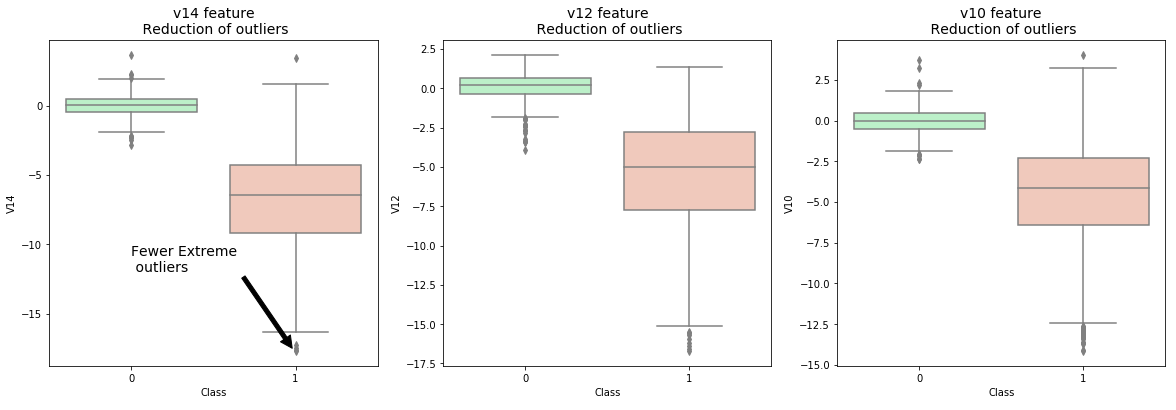

In [22]:
f, (ax1,ax2,ax3)=plt.subplots(1,3, figsize= (20,6))

colors= ['#B3F9C5', '#f9c5b3']
#boxplots with outliers removed
# featured v14
sns.boxplot(x= "Class", y= "V14", data=new_df,ax=ax1, palette= colors)
ax1.set_title("v14 feature\n Reduction of outliers", fontsize= 14)
ax1.annotate('Fewer Extreme \n outliers', xy=(0.98, -17.5), xytext= (0, -12), arrowprops= dict(facecolor= 'black'), fontsize= 14)

# featured v12
sns.boxplot(x= "Class", y= "V12", data=new_df,ax=ax2, palette= colors)
ax2.set_title("v12 feature\n Reduction of outliers", fontsize= 14)
ax2.annotate('Fewer Extreme \n outliers', xy=(0.98, -20), xytext= (0, -12), arrowprops= dict(facecolor= 'black'), fontsize= 14)

# featured v10
sns.boxplot(x= "Class", y= "V10", data=new_df,ax=ax3, palette= colors)
ax3.set_title("v10 feature\n Reduction of outliers", fontsize= 14)
ax3.annotate('Fewer Extreme \n outliers', xy=(0.95, -16.5), xytext= (0, -12), arrowprops= dict(facecolor= 'black'), fontsize= 14)

plt.show()

# Dimensionality Reduction and Clustering:
Understanding t-SNE: In order to understand this algorithm you have to understand the following terms
1. Euclidean Distance
2. Conditional Probability
3. Normal and T-Distribution Plots

t-SNE algorithm can accurately cluster the cases that were fraud and non fraud in dataset

Although the subsample is small, the t-SNE algorithm is able to detect clusters

This gives us an indication that further predictive models will perform good in seperating fraud cases from non fraud cases


In [23]:
#new_df is from the random sampling data
x= new_df.drop('Class', axis=1)
y=new_df['Class']

#T-SNE Implementation
t0= time.time()
x_reduced_tsne= TSNE(n_components=2, random_state=42).fit_transform(x.values)
t1= time.time()
print("t-SNE took {:.2} s".format(t1-t0))

#PCA Implementation
t0= time.time()
x_reduced_pca= PCA(n_components=2, random_state=2).fit_transform(x.values)
t1= time.time()
print("PCA took {:.2} s".format(t1-t0))

#TruncatedSVD
t0= time.time()
x_reduced_svd= TruncatedSVD(n_components=2, algorithm= 'randomized', random_state=42).fit_transform(x.values)
t1= time.time()
print("Truncated SVD took {:.2} s".format(t1-t0))

t-SNE took 1.7e+01 s
PCA took 1.5 s
Truncated SVD took 0.0033 s


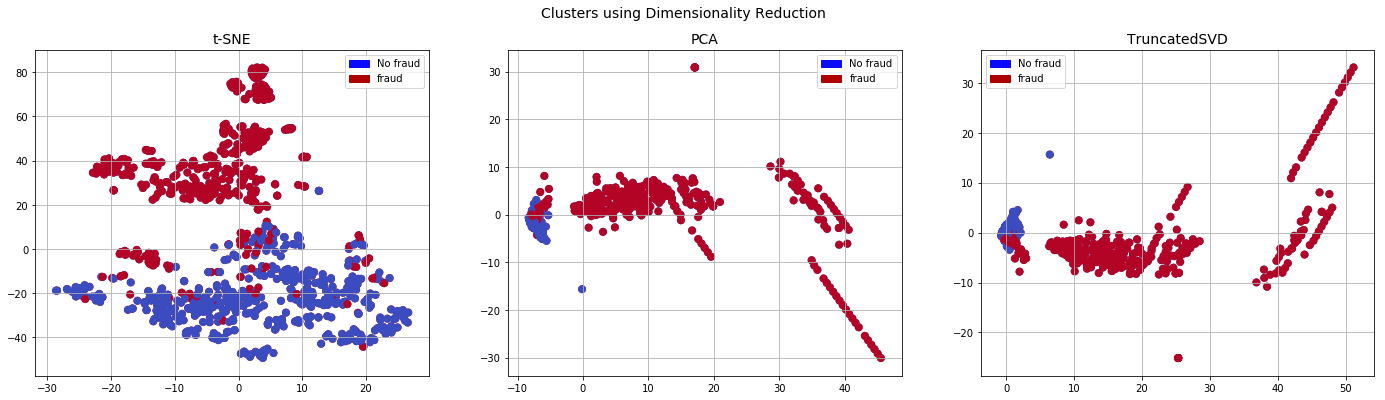

In [24]:
f, (ax1,ax2,ax3)= plt.subplots(1,3, figsize= (24,6))
#labels= ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize= 14)

blue_patch= mpatches.Patch(color="#0A0AFF", label= 'No fraud')
red_patch= mpatches.Patch(color="#AF0000", label= 'fraud')

#T-SNE Scatter Plots
ax1.scatter(x_reduced_tsne[:,0], x_reduced_tsne[:,1], c=(y==0), cmap= 'coolwarm', label= 'Fraud', linewidths=2)
ax1.scatter(x_reduced_tsne[:,0], x_reduced_tsne[:,1], c=(y==1), cmap= 'coolwarm', label= 'No Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)
ax1.grid(True)
ax1.legend(handles= [blue_patch, red_patch])

#PCA Scatter Plots
ax2.scatter(x_reduced_pca[:,0], x_reduced_pca[:,1], c=(y==0), cmap= 'coolwarm', label= 'Fraud', linewidths=2)
ax2.scatter(x_reduced_pca[:,0], x_reduced_pca[:,1], c=(y==1), cmap= 'coolwarm', label= 'No Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)
ax2.grid(True)
ax2.legend(handles= [blue_patch, red_patch])

#TruncatedSVD Scatter Plots
ax3.scatter(x_reduced_svd[:,0], x_reduced_svd[:,1], c=(y==0), cmap= 'coolwarm', label= 'Fraud', linewidths=2)
ax3.scatter(x_reduced_svd[:,0], x_reduced_svd[:,1], c=(y==1), cmap= 'coolwarm', label= 'No Fraud', linewidths=2)
ax3.set_title('TruncatedSVD', fontsize=14)
ax3.grid(True)
ax3.legend(handles= [blue_patch, red_patch])

plt.show()

# classifiers(Undersampling):
In this section we will train four types of classifiers and decide which classifiers will be more effective in accuracy of fraud transcations, we also need to split the data into train and test

GridSearchCV: is used to determine the parameters that gives the best predictve scores for the classifiers

Logistic Regression: This has the best ROC (receiver operating curve), this seperates fraud and non fraud with good accuracy

In [25]:
#Undersampling before cross validation (prone to overfit)
x= new_df.drop('Class', axis=1)
y= new_df['Class']

In [26]:
#split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state= 42)

In [27]:
X_train= X_train.values
X_test= X_test.values
y_train= y_train.values
y_test= y_test.values

In [28]:
#implement the classifier algorithm
classifiers= {
    "LogisticRegression": LogisticRegression(),
    "Knearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "Decision Tree Classifier": DecisionTreeClassifier()
}

In [29]:
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items() :
    classifier.fit(X_train, y_train)
    training_score= cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has the Training score of", 
          round(training_score.mean(),2)*100, "% accuracy score")

Classifiers:  LogisticRegression Has the Training score of 95.0 % accuracy score
Classifiers:  KNeighborsClassifier Has the Training score of 94.0 % accuracy score
Classifiers:  SVC Has the Training score of 94.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has the Training score of 90.0 % accuracy score


In [30]:
#use GridSearchCV to find the best parameters
from sklearn.model_selection import GridSearchCV

#logistic Regression
penalty = ['l1', 'l2']

C = [0.1,1,10,100,1000]

log_reg_params = {'C':C, 'penalty':penalty}
#log_reg_params= {"penality": ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]} this is not working

grid_log_reg = GridSearchCV(estimator=LogisticRegression(), param_grid=log_reg_params)
grid_log_reg.fit(X_train, y_train)
log_reg = grid_log_reg.best_estimator_

knears_params= {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears= GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
knears_reg= grid_knears.best_estimator_

svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)
svc = grid_svc.best_estimator_

tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)
tree_clf = grid_tree.best_estimator_


In [31]:
#Accuracy Scores
print("LogisticRegression:", grid_log_reg.best_score_)
print("Knears:", grid_knears.best_score_)
print("SVC:", grid_svc.best_score_)
print("DecisionTree:", grid_tree.best_score_)

LogisticRegression: 0.9505347593582888
Knears: 0.9385026737967914
SVC: 0.9411764705882353
DecisionTree: 0.9278074866310161


In [32]:
# Overfitting Case

import warnings
warnings.filterwarnings("ignore")

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

knears_score = cross_val_score(grid_knears, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(grid_svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(grid_tree, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  95.05%
Knears Neighbors Cross Validation Score 93.31%
Support Vector Classifier Cross Validation Score 93.98%
DecisionTree Classifier Cross Validation Score 92.1%


In [33]:
#We will undersample during cross validating
undersample_X= df.drop('Class', axis=1)
undersample_y= df['Class']

undersample_Xtrain, undersample_Xtest, undersample_ytrain, undersample_ytest= train_test_split(undersample_X, undersample_y)

undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values

undersample_accuracy= []
undersample_precision= []
undersample_recall= []
undersample_f1= []
undersample_auc= []

#Implementation of nearmiss technique
X_nearmiss, y_nearmiss= NearMiss().fit_sample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))

NearMiss Label Distribution: Counter({0: 492, 1: 492})


In [34]:
#crossvalidating the rightway
for train,test in sss.split(undersample_Xtrain, undersample_ytrain):
    #undersample_NearMiss= NearMiss(sampling_strategy='majority')
    undersample_pipeline= make_pipeline(NearMiss(sampling_strategy='majority'), log_reg)
    #smote happens during crossvalidation
    undersample_model= undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction= undersample_model.predict(undersample_Xtrain[test])
    undersample_accuracy.append(undersample_pipeline.score(orginal_Xtrain[test], orginal_ytrain[test]))
    undersample_precision.append(precision_score(orginal_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(orginal_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(orginal_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(orginal_ytrain[test], undersample_prediction))

In [35]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X,y, ylim= None, cv= None, n_jobs=1, train_sizes= np.linspace(.1, 1.0, 5)):
    f, ((ax1,ax2), (ax3,ax4))= plt.subplots(2,2, figsize= (20,15), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    #First Estimator
    train_sizes, train_scores, test_scores= learning_curve(estimator1, X,y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean= np.mean(train_scores, axis=1)
    train_scores_std= np.mean(train_scores, axis=1)
    test_scores_mean= np.mean(test_scores, axis=1)
    test_scores_std= np.mean(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color= "#ff9124")
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color= "#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color= "#ff9124", label= "training Score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color= "#2492ff", label= "Cross Validation Score")
    ax1.set_title("Logistic Regression Curve", fontsize= 14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc= "Best")
   
    # Second Estimator
    train_sizes, train_scores, test_scores = learning_curve(estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124", label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff", label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124", label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff", label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124", label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff", label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\praveen330\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

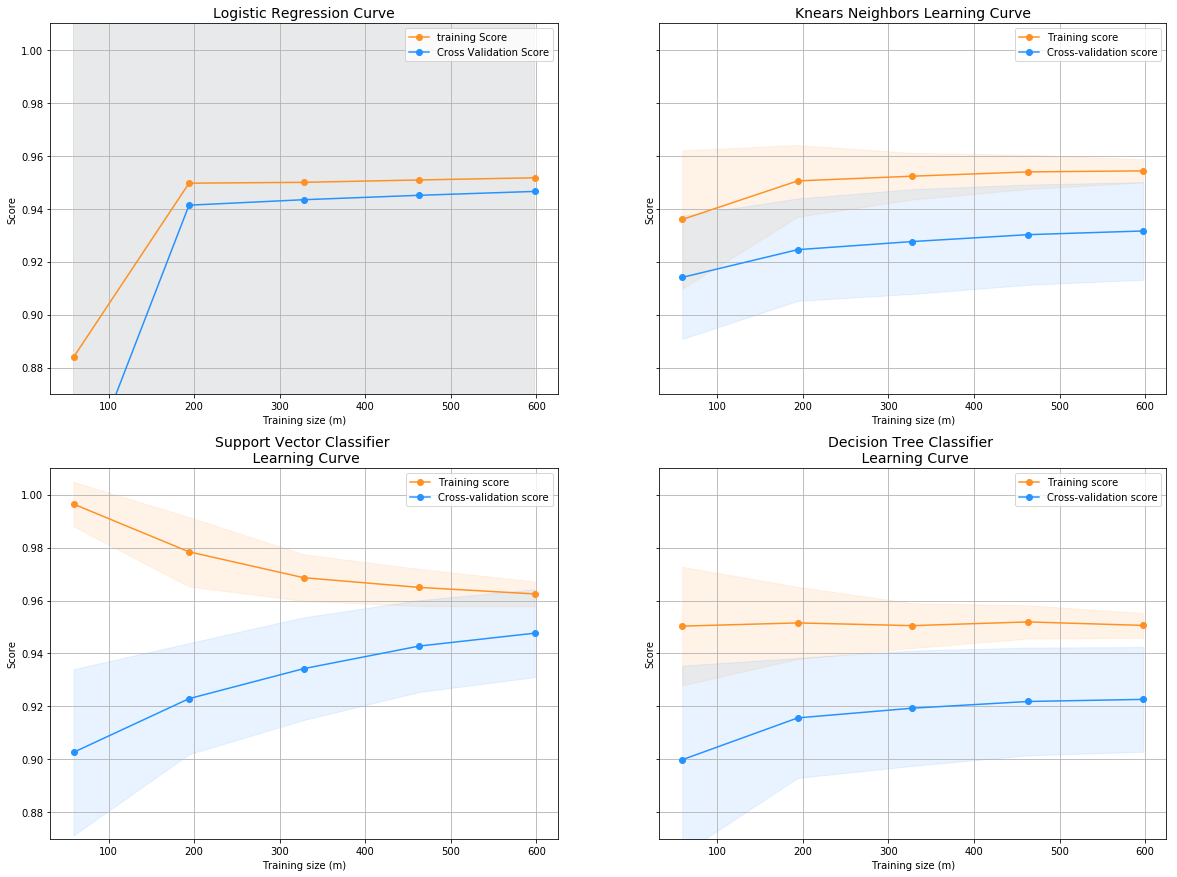

In [36]:
cv= ShuffleSplit(n_splits= 100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, knears_reg,svc, tree_clf, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

In [37]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
#create a dataframe will all scores and the classifier names:
log_reg_pred= cross_val_predict(log_reg, X_train, y_train, cv=5, method= "decision_function")
knears_pred= cross_val_predict(knears_reg, X_train, y_train, cv=5)
svc_pred= cross_val_predict(svc, X_train, y_train, cv=5, method= "decision_function")
tree_pred= cross_val_predict(tree_clf, X_train, y_train, cv=5)

In [38]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression', roc_auc_score(y_train, log_reg_pred))
print('Knears Neighbors', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier', roc_auc_score(y_train, tree_pred))

Logistic Regression 0.9790868649701395
Knears Neighbors 0.9266243612869842
Support Vector Classifier 0.9765284195850432
Decision Tree Classifier 0.9170373777372133


In [39]:
log_fpr, log_tpr, log_threshold= roc_curve(y_train, log_reg_pred)
knears_fpr, knears_tpr, knears_threshold= roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold= roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold= roc_curve(y_train, tree_pred)

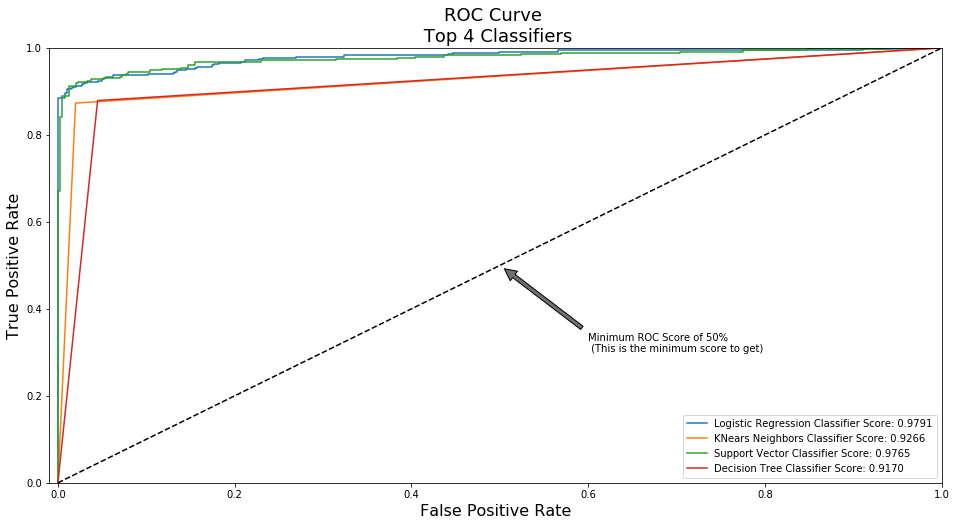

In [40]:
def graph_roc_curve_multiple(log_fpr, log_tpr, knears_fpr, knears_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knears_fpr, knears_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                     arrowprops=dict(facecolor='#6E726D', shrink=0.05))
    plt.legend()
graph_roc_curve_multiple(log_fpr, log_tpr, knears_fpr, knears_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

Terms:
True Positives: Correctly Classified Fraud Transactions
    
False Positives: Incorrectly Classified Fraud Transactions
    
True Negative: Correctly Classified Non-Fraud Transactions
    
False Negative: Incorrectly Classified Non-Fraud Transactions
    
Precision: True Positives/(True Positives + False Positives)
    
Recall: True Positives/(True Positives + False Negatives)
    
Precision as the name says, says how precise (how sure) is our model in detecting fraud transactions while recall is the
amount of fraud cases our model is able to detect.
    
Precision/Recall Tradeoff: The more precise (selective) our model is, the less cases it will detect. Example: Assuming that our
model has a precision of 95%, Let's say there are only 5 fraud cases in which the model is 95% precise or more that these are
fraud cases. Then let's say there are 5 more cases that our model considers 90% to be a fraud case, if we lower the precision
there are more cases that our model will be able to detect.

Summary: Precision starts to descend between 0.90 and 0.92 nevertheless, our precision score is still pretty high and still we have a descent recall score.

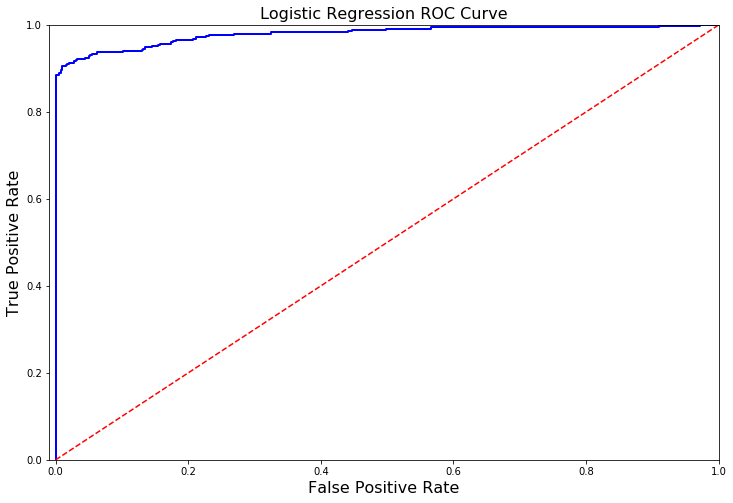

In [41]:
def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize= (12,8))
    plt.title('Logistic Regression ROC Curve', fontsize= 16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth= 2)
    plt.plot([0,1], [0,1], 'r--')
    plt.xlabel('False Positive Rate', fontsize= 16)
    plt.ylabel('True Positive Rate', fontsize= 16)
    plt.axis([-0.01, 1, 0, 1])
    
logistic_roc_curve(log_fpr, log_tpr)
plt.show()

In [42]:
from sklearn.metrics import precision_recall_curve
precision, recall, threshold =precision_recall_curve(y_train, log_reg_pred)

In [43]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred= log_reg.predict(X_train)

#overfitting case
print('------' *45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)

print('---' * 45)
print('How it should be:\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))
print('---' * 45)

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 0.91
Precision Score: 0.64
F1 Score: 0.75
Accuracy Score: 0.72
---------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------
How it should be:

Accuracy Score: 0.53
Precision Score: 0.00
Recall Score: 0.51
F1 Score: 0.00
---------------------------------------------------------------------------------------------------------------------------------------


In [44]:
undersample_y_score = log_reg.decision_function(orginal_Xtest)

In [45]:
from sklearn.metrics import average_precision_score
undersample_average_precision = average_precision_score(orginal_ytest, undersample_y_score)
print('Average precision-recall score: {0:0.2f}'.format(undersample_average_precision))

Average precision-recall score: 0.08


Text(0.5, 1.0, 'UnderSampling Precision-Recall curve: \n Average Precision-Recall Score =0.08')

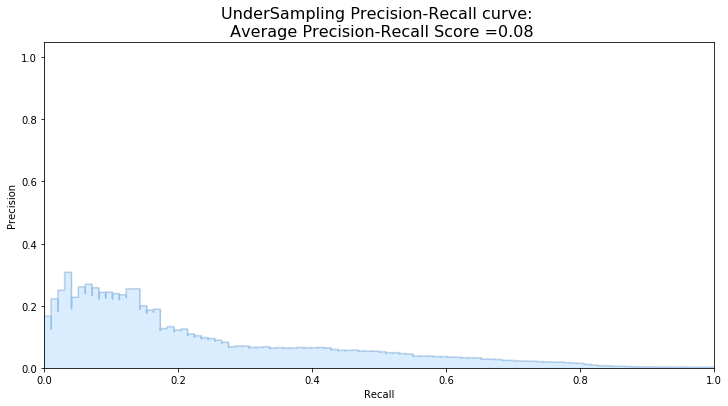

In [46]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,6))
precision, recall, _ = precision_recall_curve(orginal_ytest, undersample_y_score)
plt.step(recall, precision, color='#004a93', alpha=0.2,where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,color='#48a6ff')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('UnderSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(undersample_average_precision), fontsize=16)

# SMOTE Technique:
Solving the class imbalance: SMOTE creates synthetic points from the minority class in order to reach equal balance between minority and majority class

Location of the synthetic points: SMOTE picks the distance between the closest neighbors of the minority class, in between these distances it creates synthetic points

Final effect: more information is retained since we didnt have to delete any rows unlike in random undersampling

Accuracy||Time Tradeoff: it take more time to train since no rows are deleted

In [47]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV

print('Length of X(train): {} | Length of y(train): {}'.format(len(orginal_Xtrain), len(orginal_ytrain)))
print('Length of X(test): {} | Length of y(test): {}'.format(len(orginal_Xtest), len(orginal_ytest)))

#list to append the score and then find the average
accuracy_1st= []
precision_1st= []
recall_1st= []
f1_1st= []
auc_1st= []

#classifier with optimal parameters
log_reg_sm= LogisticRegression()

rand_log_reg= RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)

Length of X(train): 227845 | Length of y(train): 227845
Length of X(test): 56962 | Length of y(test): 56962


In [48]:
#Implementing the SMOTE technique
#Cross Validating the right way
#Parameters
from imblearn.pipeline import make_pipeline
penalty = ['l1', 'l2']

C = [0.001, 0.01, 0.1,1,10,100,1000]

log_reg_params = {'C':C, 'penalty':penalty}

for train, test in sss.split(orginal_Xtrain, orginal_ytrain):
    #pipeline= imbalanced_make_pipeline(SMOTE(sampling_strategy= 'minority'), rand_log_reg)
    pipeline = make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg)
    model= pipeline.fit(orginal_Xtrain[train], orginal_ytrain[train])
    best_est= rand_log_reg.best_estimator_
    prediction= best_est.predict(orginal_Xtrain[test])
    
    accuracy_1st.append(pipeline.score(orginal_Xtrain[test], orginal_ytrain[test]))
    precision_1st.append(precision_score(orginal_ytrain[test], prediction))
    recall_1st.append(recall_score(orginal_ytrain[test], prediction))
    f1_1st.append(f1_score(orginal_ytrain[test], prediction))
    auc_1st.append(roc_auc_score(orginal_ytrain[test], prediction))
    
print('---'*45)
print('')
print("accuracy: {}".format(np.mean(accuracy_1st)))
print("precision: {}".format(np.mean(precision_1st)))
print("recall: {}".format(np.mean(recall_1st)))
print("f1: {}".format(np.mean(f1_1st)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9778928657640062
precision: 0.06503240144362711
recall: 0.8784810126582279
f1: 0.12109498528643947
---------------------------------------------------------------------------------------------------------------------------------------


In [49]:
labels= ['No Fraud', 'Fraud']
smote_prediction= best_est.predict(orginal_Xtest)
print(classification_report(orginal_ytest, smote_prediction, target_names= labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.98      0.99     56864
       Fraud       0.06      0.90      0.12        98

   micro avg       0.98      0.98      0.98     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [50]:
y_score= best_est.decision_function(orginal_Xtest)

In [51]:
from sklearn.metrics import average_precision_score
average_precision= average_precision_score(orginal_ytest, y_score)
print(average_precision)

0.6783318526094939


Text(0.5, 1.0, 'Oversampling Precision-Recall Curve: \n Average Precision-Recall Score= 0.68')

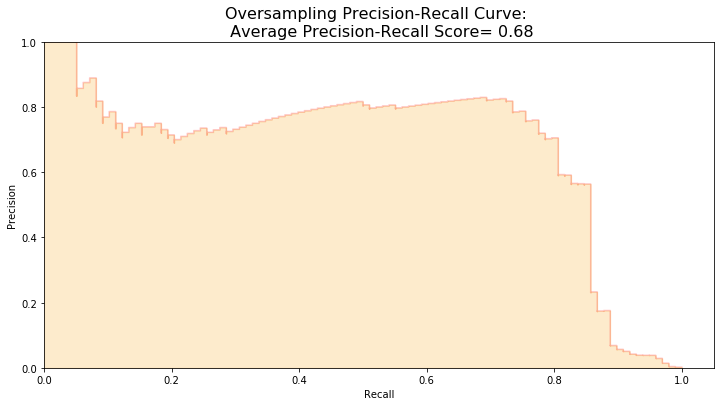

In [52]:
fig= plt.figure(figsize= (12,6))
precision, recall, _ = precision_recall_curve(orginal_ytest, y_score)
plt.step(recall, precision, color= 'r', alpha= 0.2, where= 'post')
plt.fill_between(recall, precision, step= 'post', alpha= 0.2, color= '#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.0])
plt.title('Oversampling Precision-Recall Curve: \n Average Precision-Recall Score= {0:0.2f}'.format(average_precision), fontsize= 16)

In [53]:
#SMOTE Technique (Oversampling) after splitting and cross validating
sm= SMOTE(ratio= 'minority', random_state=42)
Xsm_train, ysm_train= sm.fit_sample(orginal_Xtrain, orginal_ytrain)

In [54]:
#logistic regression
t0= time.time()
log_reg_sm= grid_log_reg.best_estimator_
log_reg_sm.fit(Xsm_train, ysm_train)
t1= time.time()
print("Fitting oversample data took :{} sec".format(t1 - t0))

Fitting oversample data took :40.7376606464386 sec


# Test Data with Logistic Regression:
Confusion Matrix:
Positive/Negative: Type of Class (label) ["No", "Yes"] True/False: Correctly or Incorrectly classified by the model.
        
True Negatives (Top-Left Square): This is the number of correctly classifications of the "No" (No Fraud Detected) class or potenial
clients that are not willing to suscribe a term deposit.

False Negatives (Top-Right Square): This is the number of incorrectly classifications of the "No"(No Fraud Detected) class or
potential clients that are not willing to suscribe a term deposit.

False Positives (Bottom-Left Square): This is the number of incorrectly classifications of the "Yes" (Fraud Detected) class or potential
clients that are willing to suscribe a term deposit.

True Positives (Bottom-Right Square): This is the number of correctly classifications of the "Yes" (Fraud Detected) class or potenial
clients that are willing to suscribe a term deposit.

Summary:
Random UnderSampling: We will evaluate the final performance of the classification models in the random undersampling
subset. Keep in mind that this is not the data from the original dataframe.

Classification Models: The models that performed the best were logistic regression and support vector classifier (SVM)

[Text(0, 0.5, ''), Text(0, 1.5, '')]

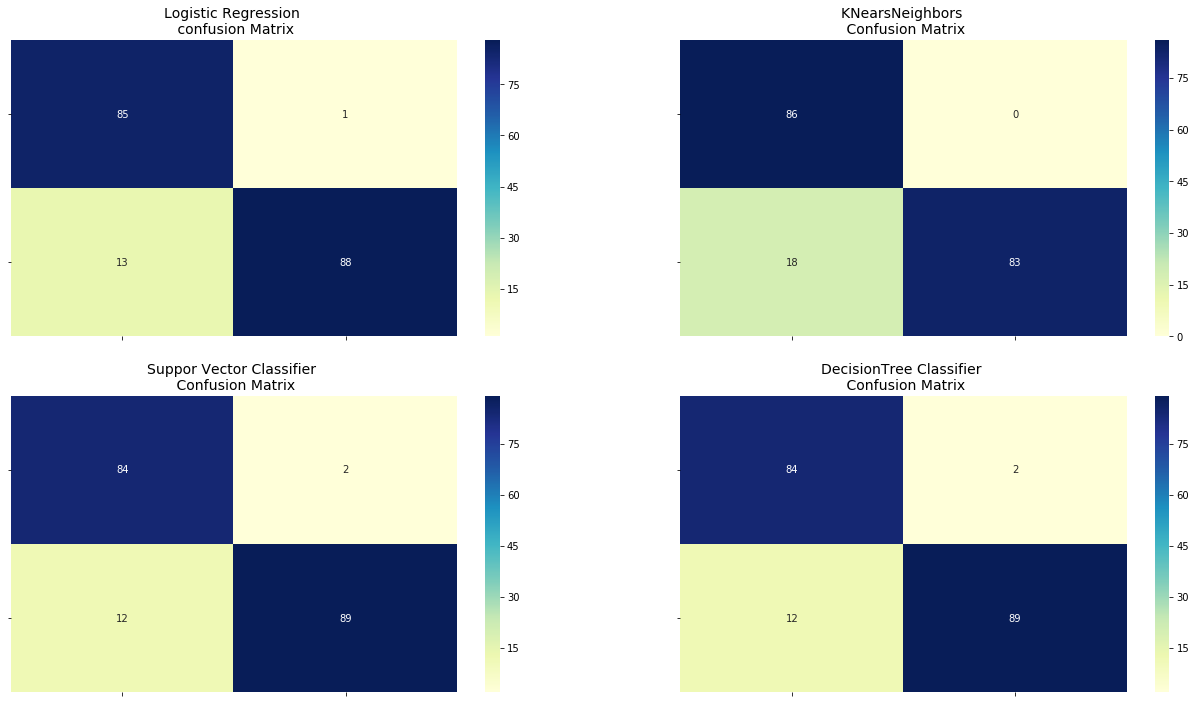

In [55]:
from sklearn.metrics import confusion_matrix

#logistic regression fitted using SMOTE technique
y_pred_log_reg= log_reg_sm.predict(X_test)

#other models fitted with undersampling
y_pred_knear = knears_reg.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)

log_reg_cf= confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

fig, ax= plt.subplots(2, 2, figsize= (22,12))

sns.heatmap(log_reg_cf, ax=ax[0][0], annot= True, cmap= "YlGnBu")
ax[0, 0].set_title("Logistic Regression \n confusion Matrix", fontsize= 14)
ax[0, 0].set_xticklabels(['', ''], fontsize= 14, rotation= 90)
ax[0, 0].set_yticklabels(['', ''], fontsize= 14, rotation= 360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap= "YlGnBu")
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap= "YlGnBu")
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap= "YlGnBu")
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

In [56]:
from sklearn.metrics import classification_report
print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))
print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))
print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))
print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_tree))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.87      0.99      0.92        86
           1       0.99      0.87      0.93       101

   micro avg       0.93      0.93      0.93       187
   macro avg       0.93      0.93      0.93       187
weighted avg       0.93      0.93      0.93       187

KNears Neighbors:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        86
           1       1.00      0.82      0.90       101

   micro avg       0.90      0.90      0.90       187
   macro avg       0.91      0.91      0.90       187
weighted avg       0.92      0.90      0.90       187

Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.88      0.98      0.92        86
           1       0.98      0.88      0.93       101

   micro avg       0.93      0.93      0.93       187
   macro avg       0.93      0.93      0.93       187
weighted

In [57]:
#Final Score in the test set of logistic regression
from sklearn.metrics import accuracy_score

#logistic regression with under-sampling
y_pred= log_reg.predict(X_test)
undersample_score = accuracy_score(y_test, y_pred)

#logistic regression with SMOTE technique
y_pred_sm= best_est.predict(orginal_Xtest)
oversample_score= accuracy_score(orginal_ytest, y_pred_sm)

d= {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df= pd.DataFrame(data=d)

#move columns
Score= final_df['Score']
final_df.drop('Score', axis=1, inplace= True)
final_df.insert(1, 'Score', Score)
final_df

,Technique,Score
0,Random UnderSampling,0.925134
1,Oversampling (SMOTE),0.976862


# Neural Networks Testing Random UnderSampling Data vs OverSampling (SMOTE):

In [58]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
n_inputs = X_train.shape[1]
undersample_model = Sequential([
Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
Dense(32, activation='relu'),
Dense(2, activation='softmax')
])

Using TensorFlow backend.


In [59]:
undersample_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                992       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 1,988
Trainable params: 1,988
Non-trainable params: 0
_________________________________________________________________


In [60]:
undersample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics= ['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [61]:
undersample_model.fit(X_train, y_train, validation_split=0.2, batch_size=25, epochs=20, shuffle=True, verbose=2)

Train on 598 samples, validate on 150 samples
Epoch 1/20
2s - loss: 0.9943 - acc: 0.7023 - val_loss: 0.3899 - val_acc: 0.8400
Epoch 2/20
0s - loss: 0.3659 - acc: 0.8579 - val_loss: 0.2790 - val_acc: 0.9000
Epoch 3/20
0s - loss: 0.2673 - acc: 0.9130 - val_loss: 0.2206 - val_acc: 0.9333
Epoch 4/20
0s - loss: 0.2158 - acc: 0.9314 - val_loss: 0.1866 - val_acc: 0.9267
Epoch 5/20
0s - loss: 0.1818 - acc: 0.9415 - val_loss: 0.1770 - val_acc: 0.9400
Epoch 6/20
0s - loss: 0.1599 - acc: 0.9431 - val_loss: 0.1648 - val_acc: 0.9400
Epoch 7/20
0s - loss: 0.1454 - acc: 0.9498 - val_loss: 0.1567 - val_acc: 0.9467
Epoch 8/20
0s - loss: 0.1342 - acc: 0.9498 - val_loss: 0.1573 - val_acc: 0.9467
Epoch 9/20
0s - loss: 0.1247 - acc: 0.9548 - val_loss: 0.1521 - val_acc: 0.9533
Epoch 10/20
0s - loss: 0.1174 - acc: 0.9548 - val_loss: 0.1534 - val_acc: 0.9533
Epoch 11/20
0s - loss: 0.1115 - acc: 0.9548 - val_loss: 0.1513 - val_acc: 0.9533
Epoch 12/20
0s - loss: 0.1064 - acc: 0.9582 - val_loss: 0.1491 - val_acc

In [62]:
undersample_predictions = undersample_model.predict(orginal_Xtest, batch_size=200, verbose=0)

In [63]:
undersample_fraud_predictions = undersample_model.predict_classes(orginal_Xtest, batch_size=200, verbose=0)

In [64]:
import itertools
#create a confusion matrix
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[54206  2658]
 [    5    93]]
Confusion matrix, without normalization
[[56864     0]
 [    0    98]]


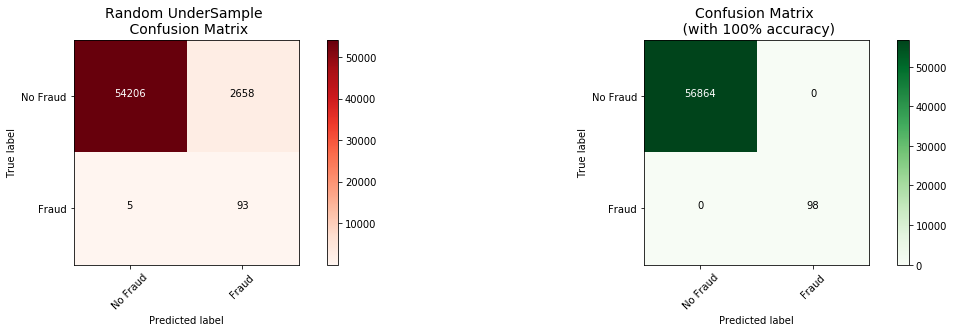

In [65]:
undersample_cm = confusion_matrix(orginal_ytest, undersample_fraud_predictions)
actual_cm = confusion_matrix(orginal_ytest, orginal_ytest)
labels = ['No Fraud', 'Fraud']
fig = plt.figure(figsize=(16,8))
fig.add_subplot(221)
plot_confusion_matrix(undersample_cm, labels, title="Random UnderSample \n Confusion Matrix", cmap=plt.cm.Reds)
fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)",cmap=plt.cm.Greens)

In [66]:
n_inputs = Xsm_train.shape[1]
oversample_model = Sequential([Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),Dense(32, activation='relu'),
Dense(2, activation='softmax')])

In [67]:
oversample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [68]:
oversample_model.fit(Xsm_train, ysm_train, validation_split=0.2, batch_size=300, epochs=20, shuffle=True, verbose=2)

Train on 363921 samples, validate on 90981 samples
Epoch 1/20
4s - loss: 0.0619 - acc: 0.9769 - val_loss: 0.0258 - val_acc: 0.9945
Epoch 2/20
3s - loss: 0.0131 - acc: 0.9969 - val_loss: 0.0087 - val_acc: 0.9998
Epoch 3/20
3s - loss: 0.0076 - acc: 0.9987 - val_loss: 0.0024 - val_acc: 1.0000
Epoch 4/20
3s - loss: 0.0057 - acc: 0.9990 - val_loss: 0.0026 - val_acc: 0.9999
Epoch 5/20
4s - loss: 0.0044 - acc: 0.9993 - val_loss: 0.0017 - val_acc: 1.0000
Epoch 6/20
4s - loss: 0.0038 - acc: 0.9993 - val_loss: 0.0022 - val_acc: 0.9999
Epoch 7/20
5s - loss: 0.0034 - acc: 0.9995 - val_loss: 0.0018 - val_acc: 0.9999
Epoch 8/20
3s - loss: 0.0030 - acc: 0.9995 - val_loss: 8.1623e-04 - val_acc: 1.0000
Epoch 9/20
4s - loss: 0.0027 - acc: 0.9996 - val_loss: 3.4003e-04 - val_acc: 1.0000
Epoch 10/20
4s - loss: 0.0025 - acc: 0.9995 - val_loss: 7.2184e-04 - val_acc: 1.0000
Epoch 11/20
3s - loss: 0.0022 - acc: 0.9996 - val_loss: 0.0034 - val_acc: 0.9992
Epoch 12/20
3s - loss: 0.0023 - acc: 0.9996 - val_loss:

In [69]:
oversample_predictions = oversample_model.predict(orginal_Xtest, batch_size=200, verbose=0)

In [70]:
oversample_fraud_predictions = oversample_model.predict_classes(orginal_Xtest, batch_size=200, verbose=0)

Confusion matrix, without normalization
[[56818    46]
 [   21    77]]
Confusion matrix, without normalization
[[56864     0]
 [    0    98]]


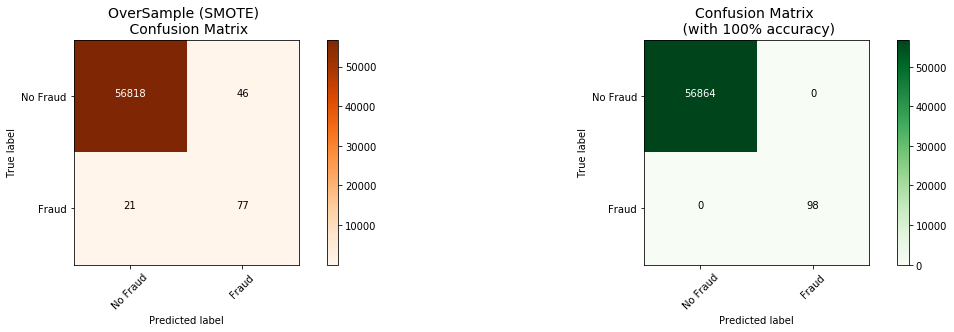

In [71]:
oversample_smote = confusion_matrix(orginal_ytest, oversample_fraud_predictions)
actual_cm = confusion_matrix(orginal_ytest, orginal_ytest)
labels = ['No Fraud', 'Fraud']
fig = plt.figure(figsize=(16,8))
fig.add_subplot(221)
plot_confusion_matrix(oversample_smote, labels, title="OverSample (SMOTE) \n Confusion Matrix", cmap=plt.cm.Oranges)
fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)",
cmap=plt.cm.Greens)

# Conclusion:
Implementing SMOTE on our imbalanced dataset helped us with the imbalance of our labels (more no fraud than fraud transactions).
Nevertheless, I still have to state that sometimes the neural network on the oversampled dataset predicts less correct fraud
transactions than our model using the undersample dataset. However, remember that the removal of outliers was implemented only on
the random undersample dataset and not on the oversampled one. Also, in our undersample data our model is unable to detect for a
large number of cases non fraud transactions correctly and instead, misclassifies those non fraud transactions as fraud cases. Imagine
that people that were making regular purchases got their card blocked due to the reason that our model classified that transaction as a
fraud transaction, this will be a huge disadvantage for the financial institution. The number of customer complaints and customer
disatisfaction will increase. The next step of this analysis will be to do an outlier removal on our oversample dataset and see if our
accuracy in the test set improves.